### Q-3.
Imagine you have a dataset where you have different categories of data, Now
you need to find the most similar data to the given data by using any 4 different
similarity algorithms. Now you have to build a model which can find the most similar
data to the given data.
Dataset This is the Dataset You can use this dataset for this question.

In [1]:
import pandas as pd
import json 

# Graph plotting library
import matplotlib.pyplot as plt
import seaborn as sns

# Text based library
import re
import string
import nltk

import os
import random

# Sk-learn library
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

# tensorflow library
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense

In [3]:
df = pd.read_json(r"C:\Users\Balodi\Downloads\News_Category_Dataset_v3.json\News_Category_Dataset_v3.json",lines=True)

In [4]:
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [5]:
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [6]:
# Basic operation

In [7]:
df.shape

(209527, 6)

In [8]:
df.dtypes

link                         object
headline                     object
category                     object
short_description            object
authors                      object
date                 datetime64[ns]
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


In [10]:
df.duplicated().sum()

13

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [14]:
df.isnull().sum()

link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64

In [15]:
df.describe().T

,count,unique,top,freq,first,last
link,209514,209486,https://www.huffingtonpost.comhttp://www.nytim...,2,NaT,NaT
headline,209514,207996,Sunday Roundup,90,NaT,NaT
category,209514,42,POLITICS,35601,NaT,NaT
short_description,209514,187022,,19712,NaT,NaT
authors,209514,29169,,37405,NaT,NaT
date,209514,3890,2014-03-25 00:00:00,100,2012-01-28,2022-09-23


In [16]:
# For categorical features

categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']
print(categorical_features)

['link', 'headline', 'category', 'short_description', 'authors']


In [17]:
# For other type features

numerical_features = [feature for feature in df.columns if df[feature].dtype != 'object']
print(numerical_features)

['date']


In [18]:
## EDA

In [19]:
df['link'].value_counts()

https://www.huffingtonpost.comhttp://www.nytimes.com/2016/04/08/us/politics/ted-cruz-donors.html                              2
https://www.huffingtonpost.comhttp://elections.huffingtonpost.com/pollster/2016-california-democratic-presidential-primary    2
https://www.huffingtonpost.comhttp://testkitchen.huffingtonpost.com/thecrossing/                                              2
https://www.huffingtonpost.comhttp://recode.net/2015/09/29/twitter-plans-to-go-beyond-its-140-character-limit/                2
https://www.huffingtonpost.comhttp://www.newrepublic.com/article/112892/hell-american-day-care                                2
                                                                                                                             ..
https://www.huffingtonpost.com/entry/snl-seinfeld-reunion-julia-louis-dreyfus_us_57139ae8e4b0018f9cba4a04                     1
https://www.huffingtonpost.com/entry/kesha-coachella-2016_us_5713b8e1e4b0060ccda384db                   

In [20]:
df['headline'].value_counts()

Sunday Roundup                                                                        90
The 20 Funniest Tweets From Women This Week                                           80
Weekly Roundup of eBay Vintage Clothing Finds (PHOTOS)                                59
Weekly Roundup of eBay Vintage Home Finds (PHOTOS)                                    54
Watch The Top 9 YouTube Videos Of The Week                                            46
                                                                                      ..
Supreme Court Chief Justice John Roberts Swore In Deaf Lawyers Using Sign Language     1
Here Are The Manufacturers Bringing The Most Jobs Back to America                      1
2016 Campaigns Meet With White House To Prep For Obama's Last Days In Office           1
If Toddlers Could Calmly Articulate Their Feelings                                     1
Dwight Howard Rips Teammates After Magic Loss To Hornets                               1
Name: headline, Lengt

In [21]:
df['category'].value_counts()

POLITICS          35601
WELLNESS          17942
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9811
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3571
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2100
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1443
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

In [22]:
df['short_description'].value_counts()

                                                                                                                                 19712
Welcome to the HuffPost Rise Morning Newsbrief, a short wrap-up of the news to help you start your day.                            192
The stress and strain of constantly being connected can sometimes take your life -- and your well-being -- off course. GPS         125
Want more? Be sure to check out HuffPost Style on Twitter, Facebook, Tumblr, Pinterest and Instagram at @HuffPostStyle. -- Do       91
Do you have a home story idea or tip? Email us at homesubmissions@huffingtonpost.com. (PR pitches sent to this address will         75
                                                                                                                                 ...  
It's one of the thorniest moral dilemmas in tech right now.                                                                          1
The new addition to the family will be a little sibling

In [23]:
df['authors'].value_counts()

                                                                          37405
Lee Moran                                                                  2954
Ron Dicker                                                                 2219
Ed Mazza                                                                   1590
Mary Papenfuss                                                             1566
                                                                          ...  
Holly Ramer, Associated Press                                                 1
Gina Carey, The Huffington Post                                               1
Randall Chase, Associated Press                                               1
Stephen Ohlemacher, AP                                                        1
John Giacobbi, Contributor\nTales from the Interweb by The Web Sheriff        1
Name: authors, Length: 29169, dtype: int64

In [24]:
# Geting count for each category

category_count = df['category'].value_counts()
print(category_count)
print(f'There are {len(category_count)} categories of news')

POLITICS          35601
WELLNESS          17942
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9811
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3571
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2100
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1443
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

In [25]:
## Data Preprocessing

In [26]:
new_df = df[df['date'] >= pd.Timestamp(2019,1,1)] 

In [27]:
# Adding a column by combining 'headline' and 'short_description'

new_df['news_text'] = new_df['headline']+' '+new_df['short_description']+' ' +new_df['category']

In [28]:
new_df.head()

,link,headline,category,short_description,authors,date,news_text
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,Over 4 Million Americans Roll Up Sleeves For O...
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,"American Airlines Flyer Charged, Banned For Li..."
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,23 Of The Funniest Tweets About Cats And Dogs ...
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,The Funniest Tweets From Parents This Week (Se...
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,Woman Who Called Cops On Black Bird-Watcher Lo...


In [29]:
# Dropping unnecessary columns

new_df = new_df.drop(["link", "authors", "category", "date", "short_description"],axis = 1)


In [31]:
#Preparing dataset for K-Nearest Neighbour and Conditoinal Probability
# Reading dataset with required column

dataset = df[['headline', 'short_description', 'category']]
dataset.head()

,headline,short_description,category
0,Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,U.S. NEWS
1,"American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,U.S. NEWS
2,23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you don't understand wha...",COMEDY
3,The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...",PARENTING
4,Woman Who Called Cops On Black Bird-Watcher Lo...,Amy Cooper accused investment firm Franklin Te...,U.S. NEWS


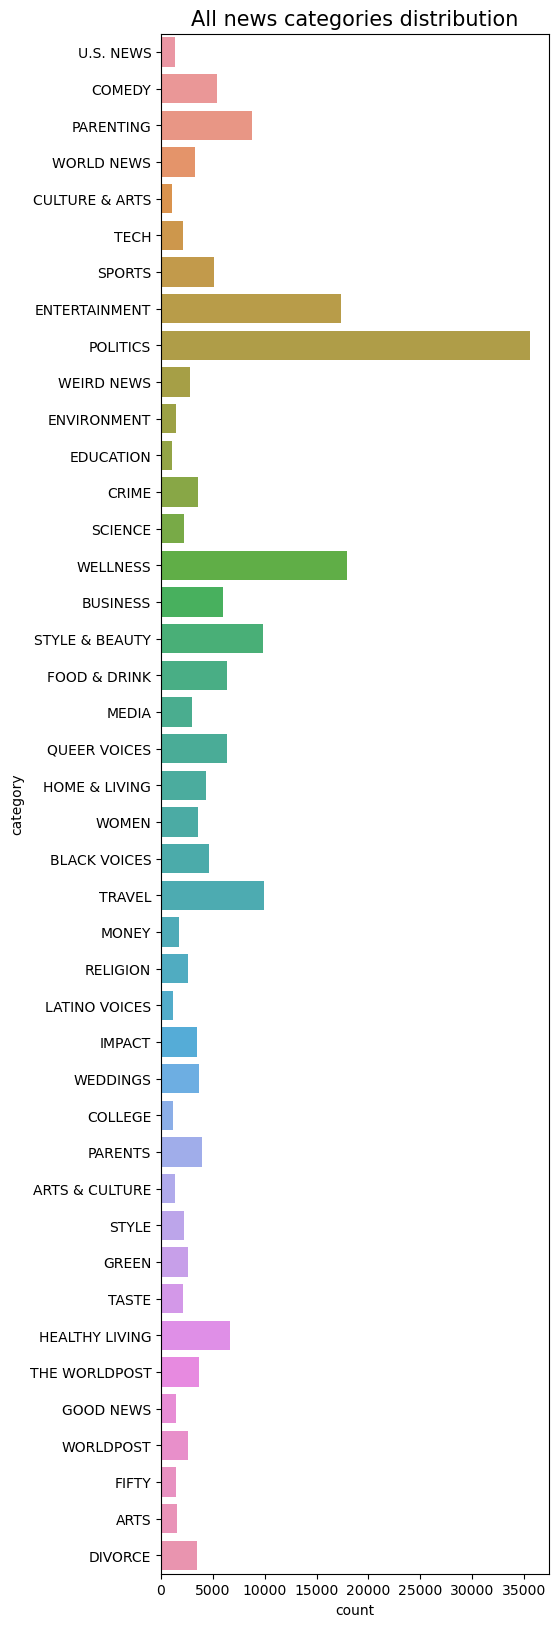

In [32]:
# Ploting  horizontal distribution for category column

plt.figure(figsize = [5, 20])
sns.countplot(y=dataset["category"], orient = 'h')
plt.title("All news categories distribution", fontsize = 15)
plt.show()

['POLITICS', 'WELLNESS', 'ENTERTAINMENT', 'TRAVEL', 'STYLE & BEAUTY', 'PARENTING', 'HEALTHY LIVING', 'QUEER VOICES', 'FOOD & DRINK', 'BUSINESS', 'COMEDY', 'SPORTS', 'BLACK VOICES', 'HOME & LIVING', 'PARENTS']


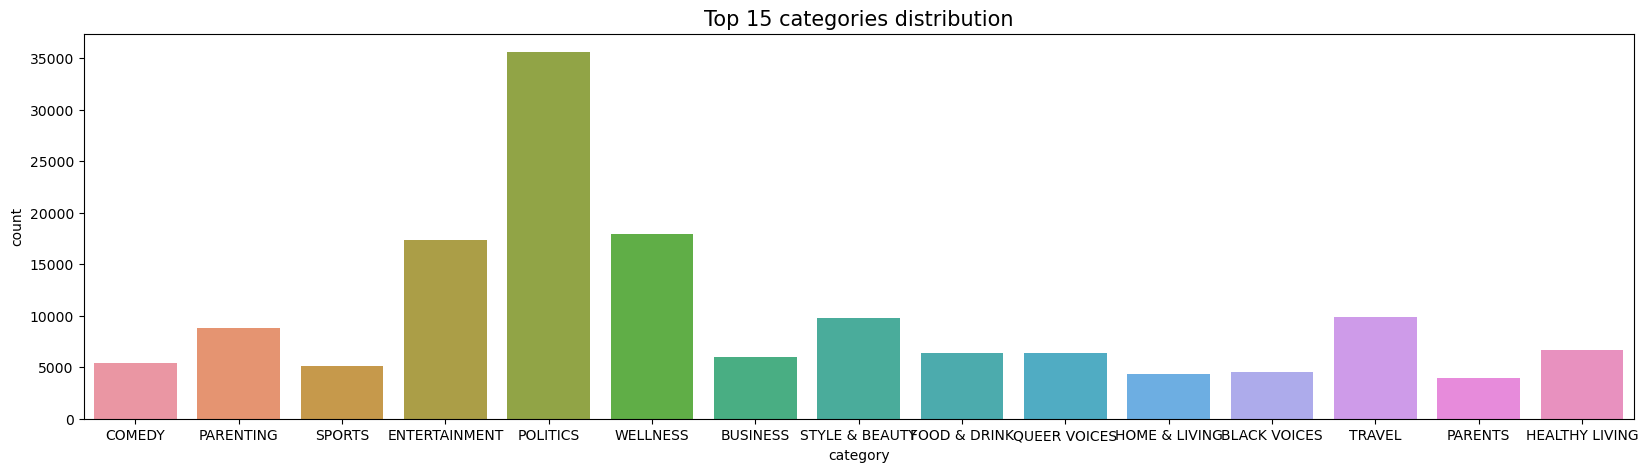

In [34]:
#From the results above, there are in total of 42 categories of news. To accomodate with computing power, we will train models with the top 15 categories bold text
# Considering only top 15 category for train data

top_categories = list(dataset["category"].value_counts().nlargest(15).keys())
print(top_categories)

# Plotting distribution 

dataset_top = dataset[dataset['category'].isin(top_categories)]
plt.figure(figsize = [20, 5])
sns.countplot(x=dataset_top["category"])
plt.title("Top 15 categories distribution", fontsize = 15)
plt.show()